<a href="https://colab.research.google.com/github/lemonredwood/semantic-segmentation/blob/main/U_NET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
from PIL import Image as pil_image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


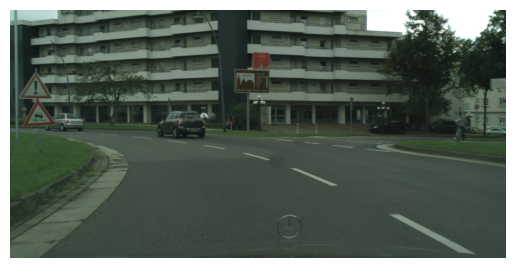

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image file from Google Drive
image_path = "/content/drive/My Drive/sample_data/Images/aachen/aachen_000000_000019_leftImg8bit.png"
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
# Define paths to the dataset folders
dataset_dir = '/content/drive/My Drive/sample_data/'
images_dir = os.path.join(dataset_dir, 'Images')
labels_dir = os.path.join(dataset_dir, 'Labels')

DATA PRE-PROCESSING

In [ ]:
# Define data augmentation parameters
data_gen_args = dict(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Create data generator for images
image_datagen = ImageDataGenerator(**data_gen_args)
label_datagen = ImageDataGenerator(**data_gen_args)

# Define batch size
batch_size = 32


In [ ]:
# Create image and label generators
seed = 1  # Set random seed for reproducibility
image_generator = image_datagen.flow_from_directory(
    images_dir,
    target_size=(256, 256),  # Resize images to (256, 256)
    batch_size=batch_size,
    class_mode=None,
    seed=seed
)

label_generator = label_datagen.flow_from_directory(
    labels_dir,
    target_size=(256, 256),  # Resize labels to (256, 256)
    batch_size=batch_size,
    class_mode=None,
    seed=seed,
    color_mode='grayscale'  # Ensure labels are read as grayscale images
)

# Combine image and label generators into a single generator
train_generator = zip(image_generator, label_generator)

Found 24 images belonging to 2 classes.
Found 125 images belonging to 2 classes.


In [ ]:
# Example usage: Iterate through batches of preprocessed data
for i, (image_batch, label_batch) in enumerate(train_generator):
    # Your custom preprocessing or model training code here
    print("Image batch shape:", image_batch.shape)
    print("Label batch shape:", label_batch.shape)
    # Break the loop after a few batches for demonstration purposes
    if i >= 2:
        break

Image batch shape: (24, 256, 256, 3)
Label batch shape: (32, 256, 256, 1)
Image batch shape: (24, 256, 256, 3)
Label batch shape: (32, 256, 256, 1)
Image batch shape: (24, 256, 256, 3)
Label batch shape: (32, 256, 256, 1)


DATA EXPLORATION

In [ ]:
# Define a function to load and process images
def load_and_process_image(img_path):
    img = load_img(img_path)
    img_array = np.array(img)
    return img_array

In [ ]:
# Get the list of image filenames
image_filenames = os.listdir(images_dir)

# Define an empty list to store image sizes
image_sizes = []

In [ ]:
# Iterate through each image in the dataset
for filename in image_filenames:
    # Load and process the image
    img_path = os.path.join(images_dir, filename)

    # Check if the path is a file and has a valid image extension
    if os.path.isfile(img_path) and any(img_path.endswith(ext) for ext in ['.png', '.jpg', '.jpeg']):
        img_array = load_and_process_image(img_path)

        # Get the size of the image
        img_size = img_array.shape[:2]  # Assuming images are 2D (height, width)

        # Append the image size to the list
        image_sizes.append(img_size)


In [ ]:
# Flatten the image sizes array to include all widths
image_widths = image_sizes.flatten()

# Calculate the mean and standard deviation of image widths
mean_width = np.mean(image_widths)
std_width = np.std(image_widths)

# Calculate the mean and standard deviation of image widths
mean_width = np.mean(image_widths)
std_width = np.std(image_widths)



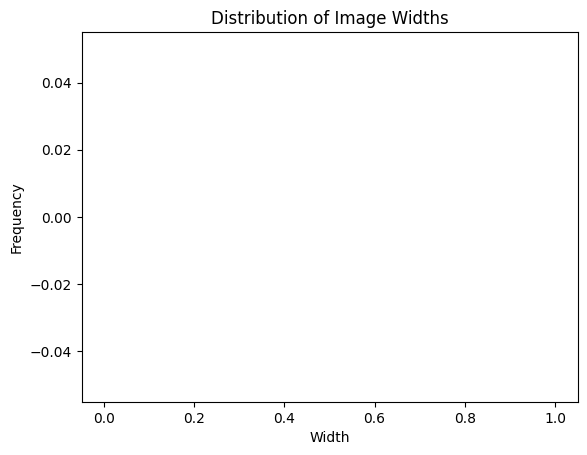

Mean Image Width: nan


In [ ]:
# Plot histogram of image widths
plt.hist(image_widths, bins=30, color='b', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

# Print mean and standard deviation of image widths
print("Mean Image Width:", mean_width)
